### Machine learning mini project
### Team members - Anushka Thakur 44 and Kapil Bodkhe 60

### Import the required libraries


In [ ]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # for numeric analysis
import matplotlib.pyplot as plt # To plot the data
import seaborn as sns # For data visualisation

## Step 1- Load the data set

In [ ]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Step 2- Data cleaning and formatting


In [ ]:
# Display first few rows to get a sense of the data structure
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# Display last few rows for similar
print(data.tail())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


In [ ]:
# Check for missing values in each column
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Check for unique values in each column
print(data.nunique())


Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [ ]:
# Show data types of each column
print(data.dtypes)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
# Identify columns with null values and their proportion
nulls = data.isnull().mean() * 100
print(nulls[nulls > 0])


Series([], dtype: float64)


In [ ]:
# Get a summary of categorical columns
object_cols = data.select_dtypes(include=['object']).columns
if len(object_cols) > 0:
    print(data[object_cols].describe())
else:
    print("No columns with 'object' dtype found in the DataFrame.")
    print("Data types of all columns:", data.dtypes)

No columns with 'object' dtype found in the DataFrame.
Data types of all columns: Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
# Summary of numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(data[numerical_cols].describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [ ]:
# Check for duplicated rows
print("Number of duplicated rows:", data.duplicated().sum())

Number of duplicated rows: 0


In [ ]:
correlations = data.corr()['Outcome'].sort_values(ascending=False)
print(correlations)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


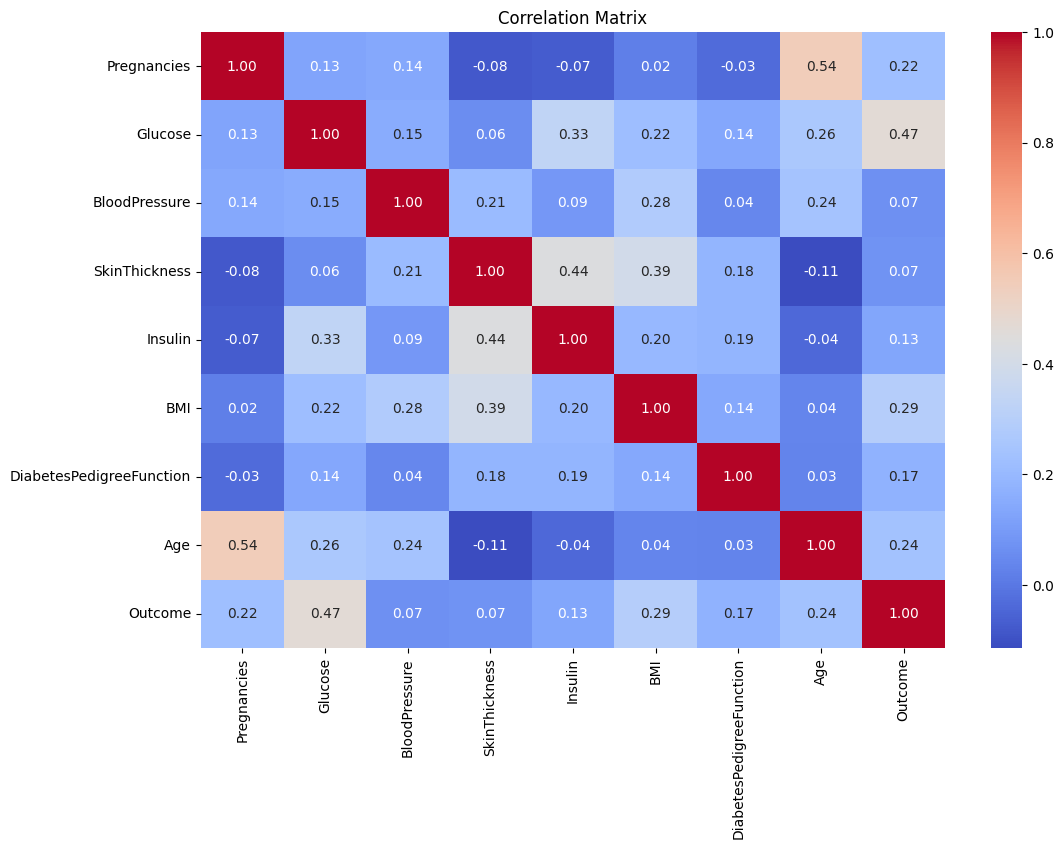

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Step 3 - Exploratory data analysis

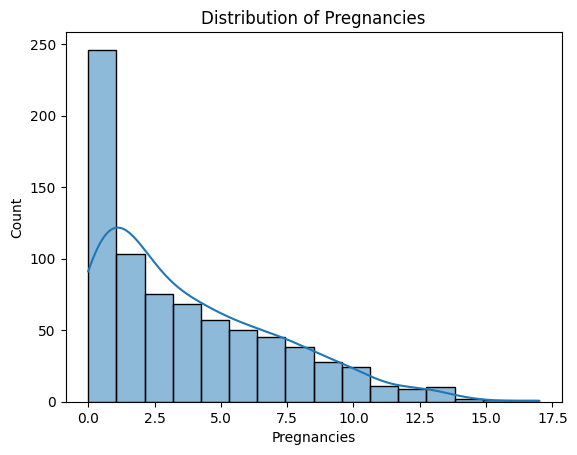

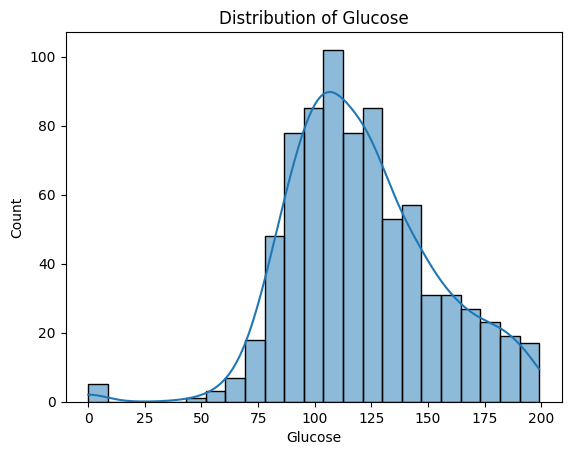

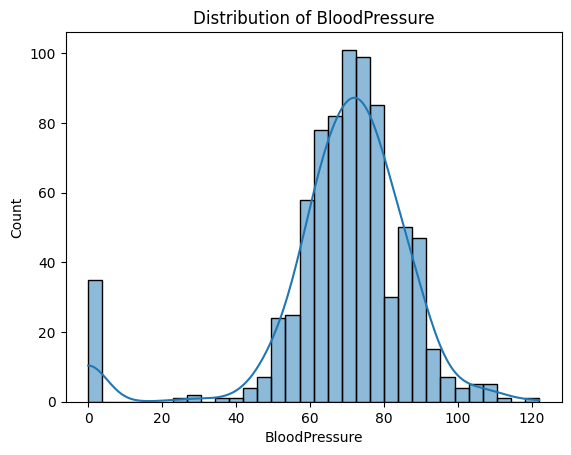

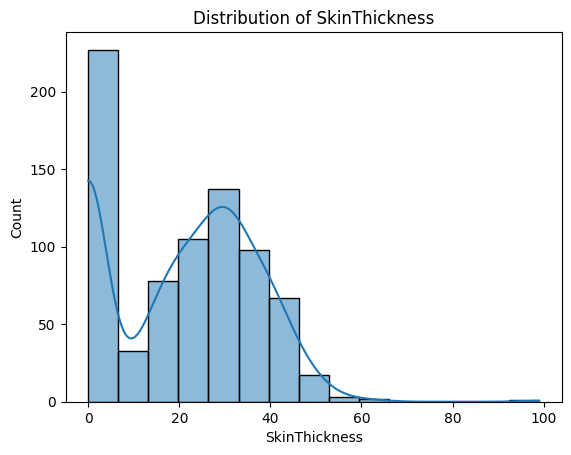

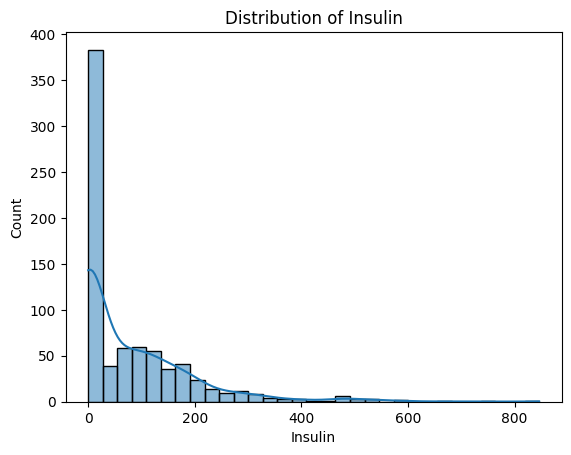

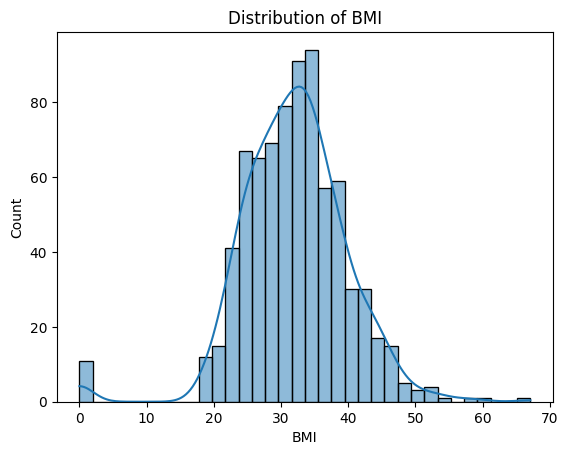

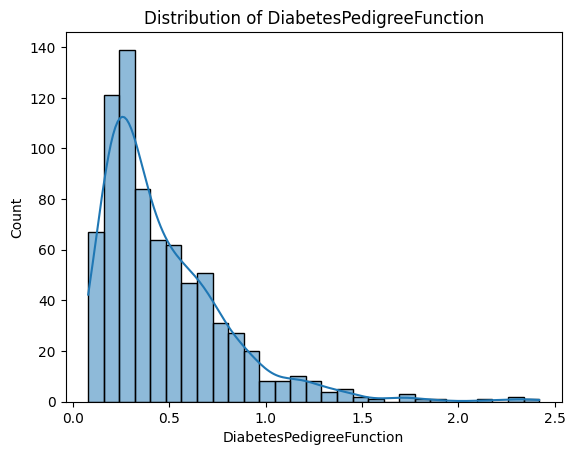

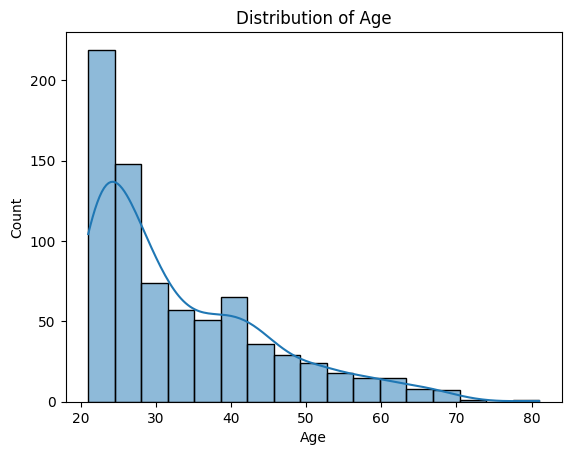

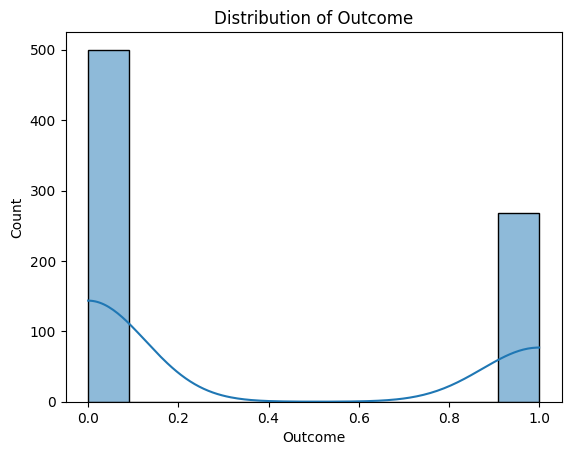

In [ ]:
for column in data.columns:
    plt.figure()
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


Target Variable Distribution:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


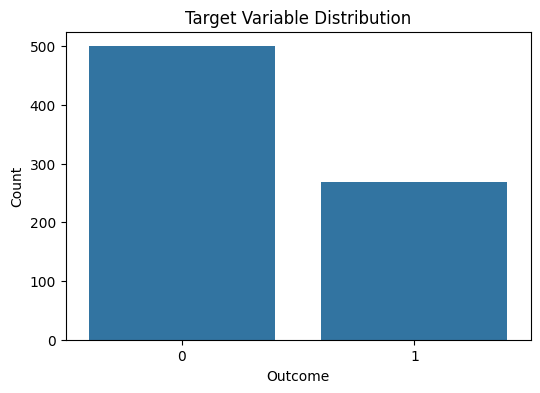

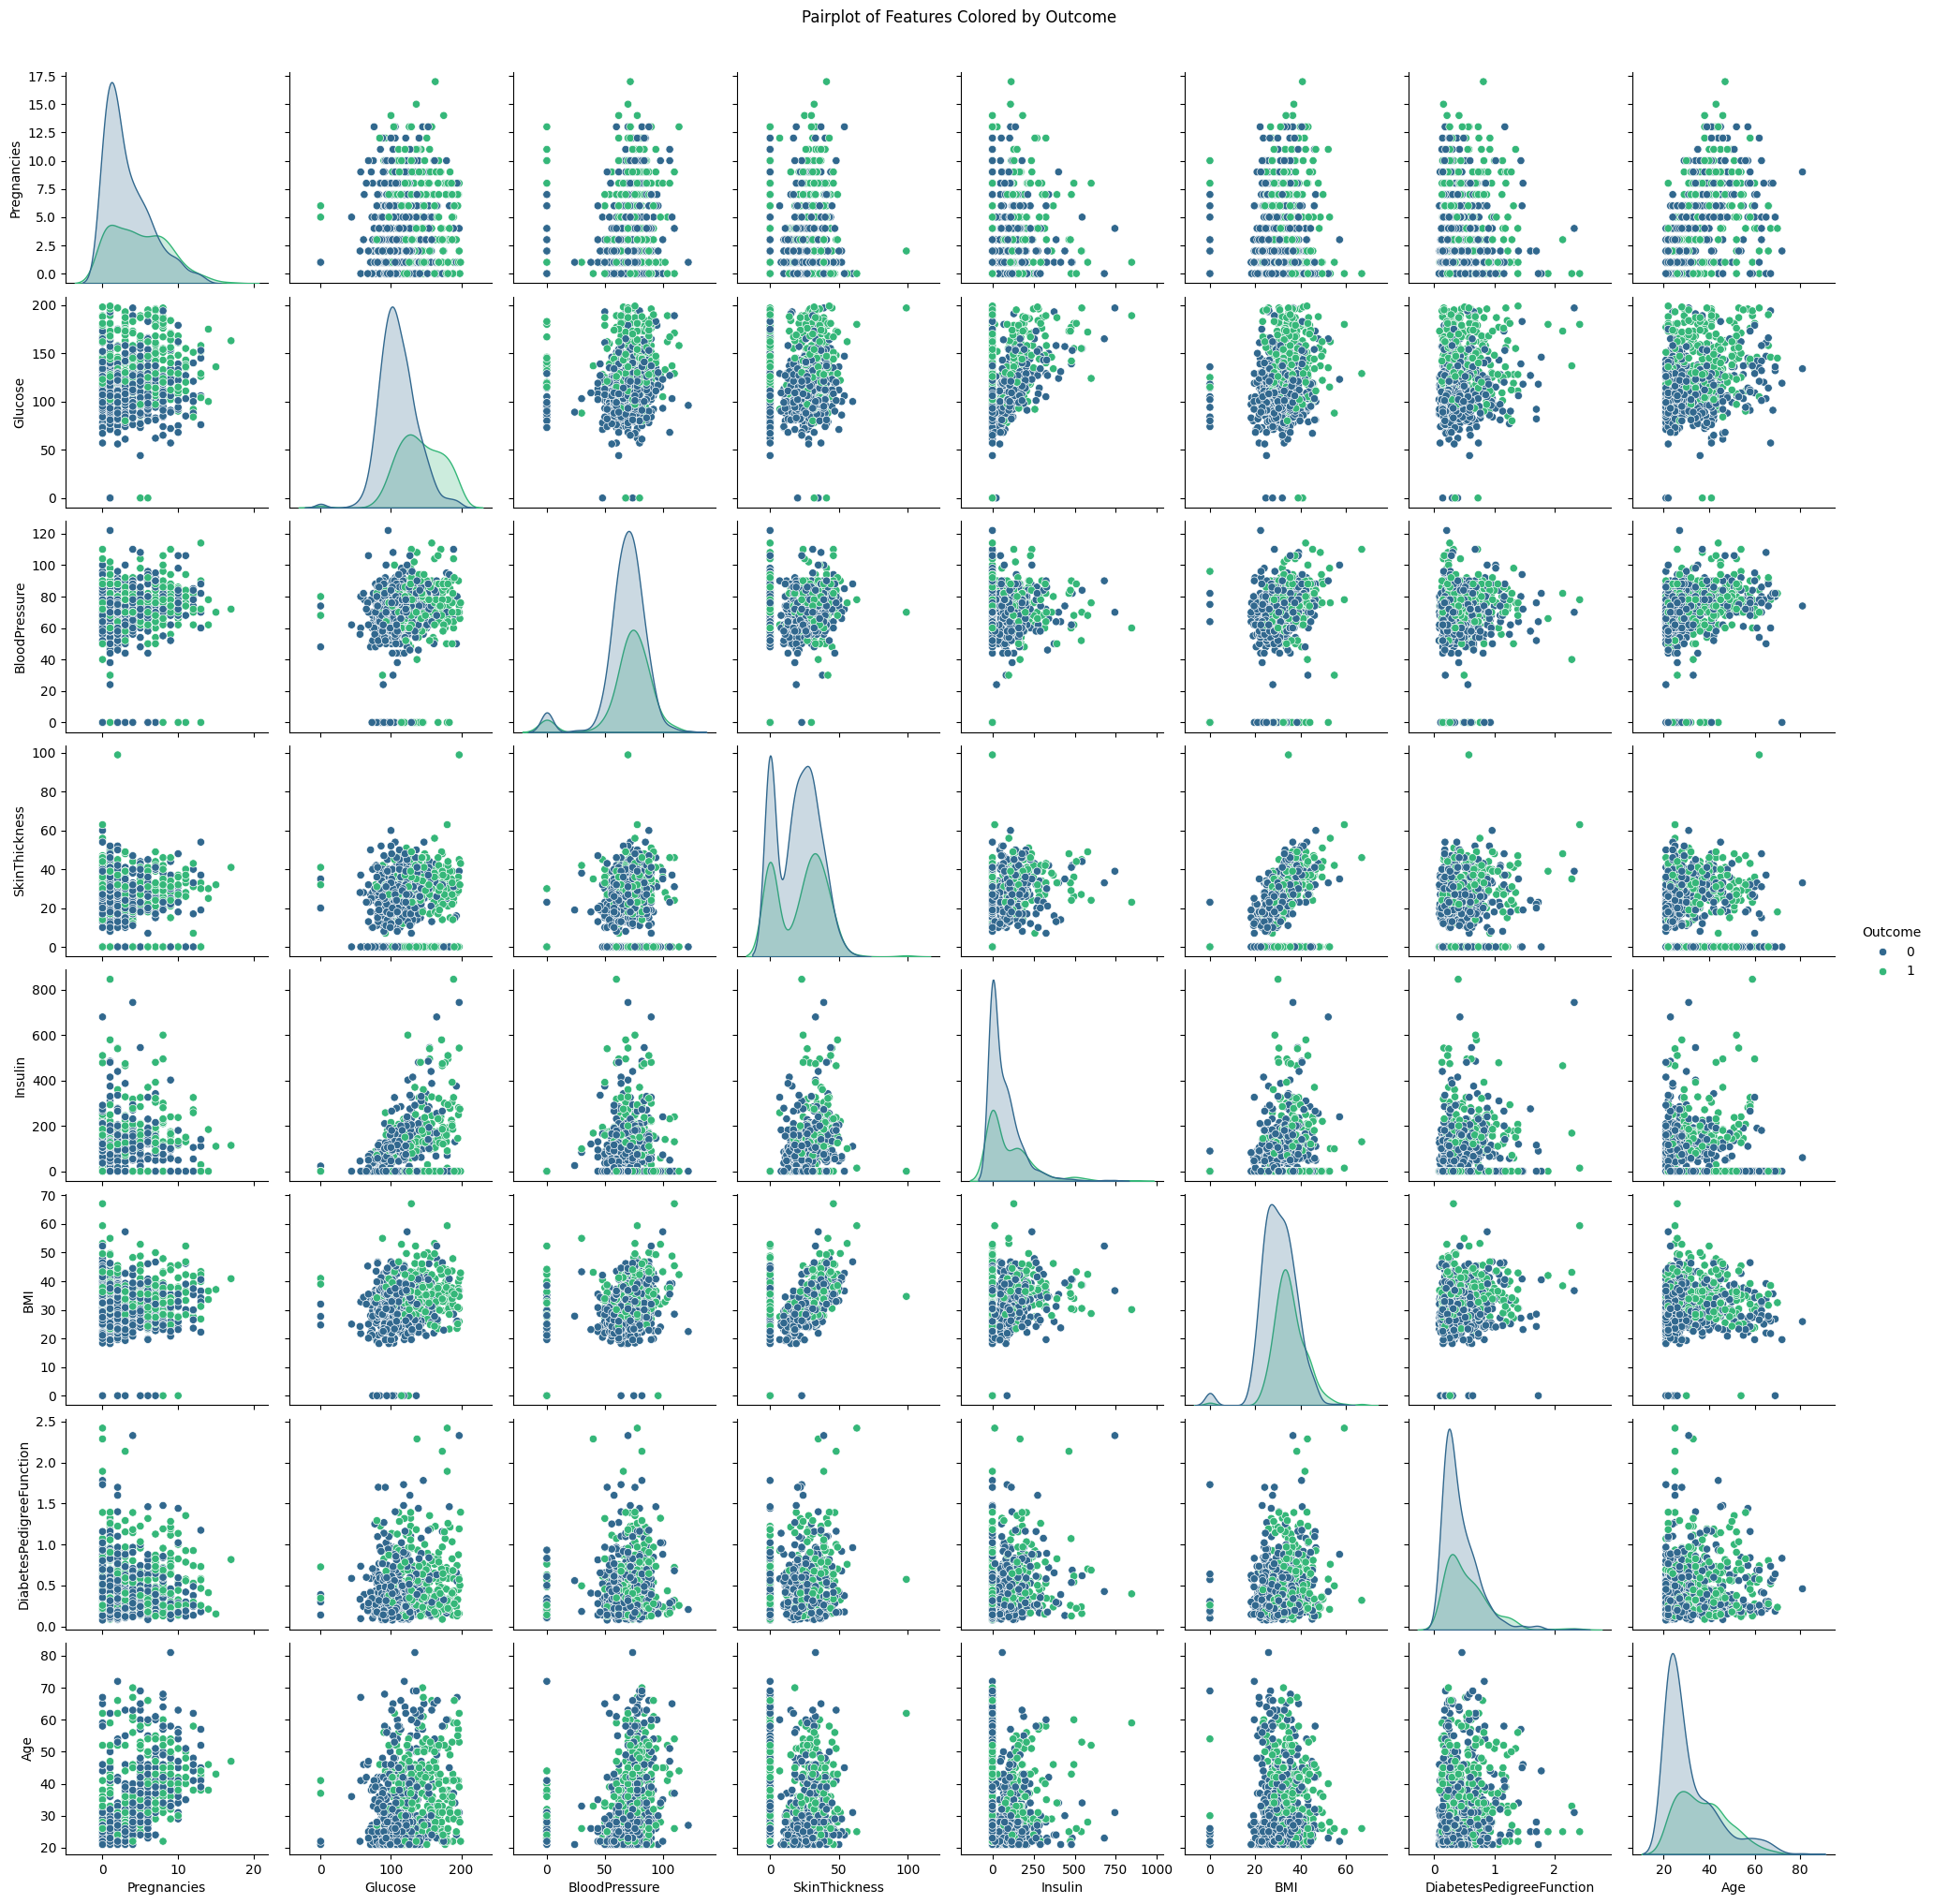

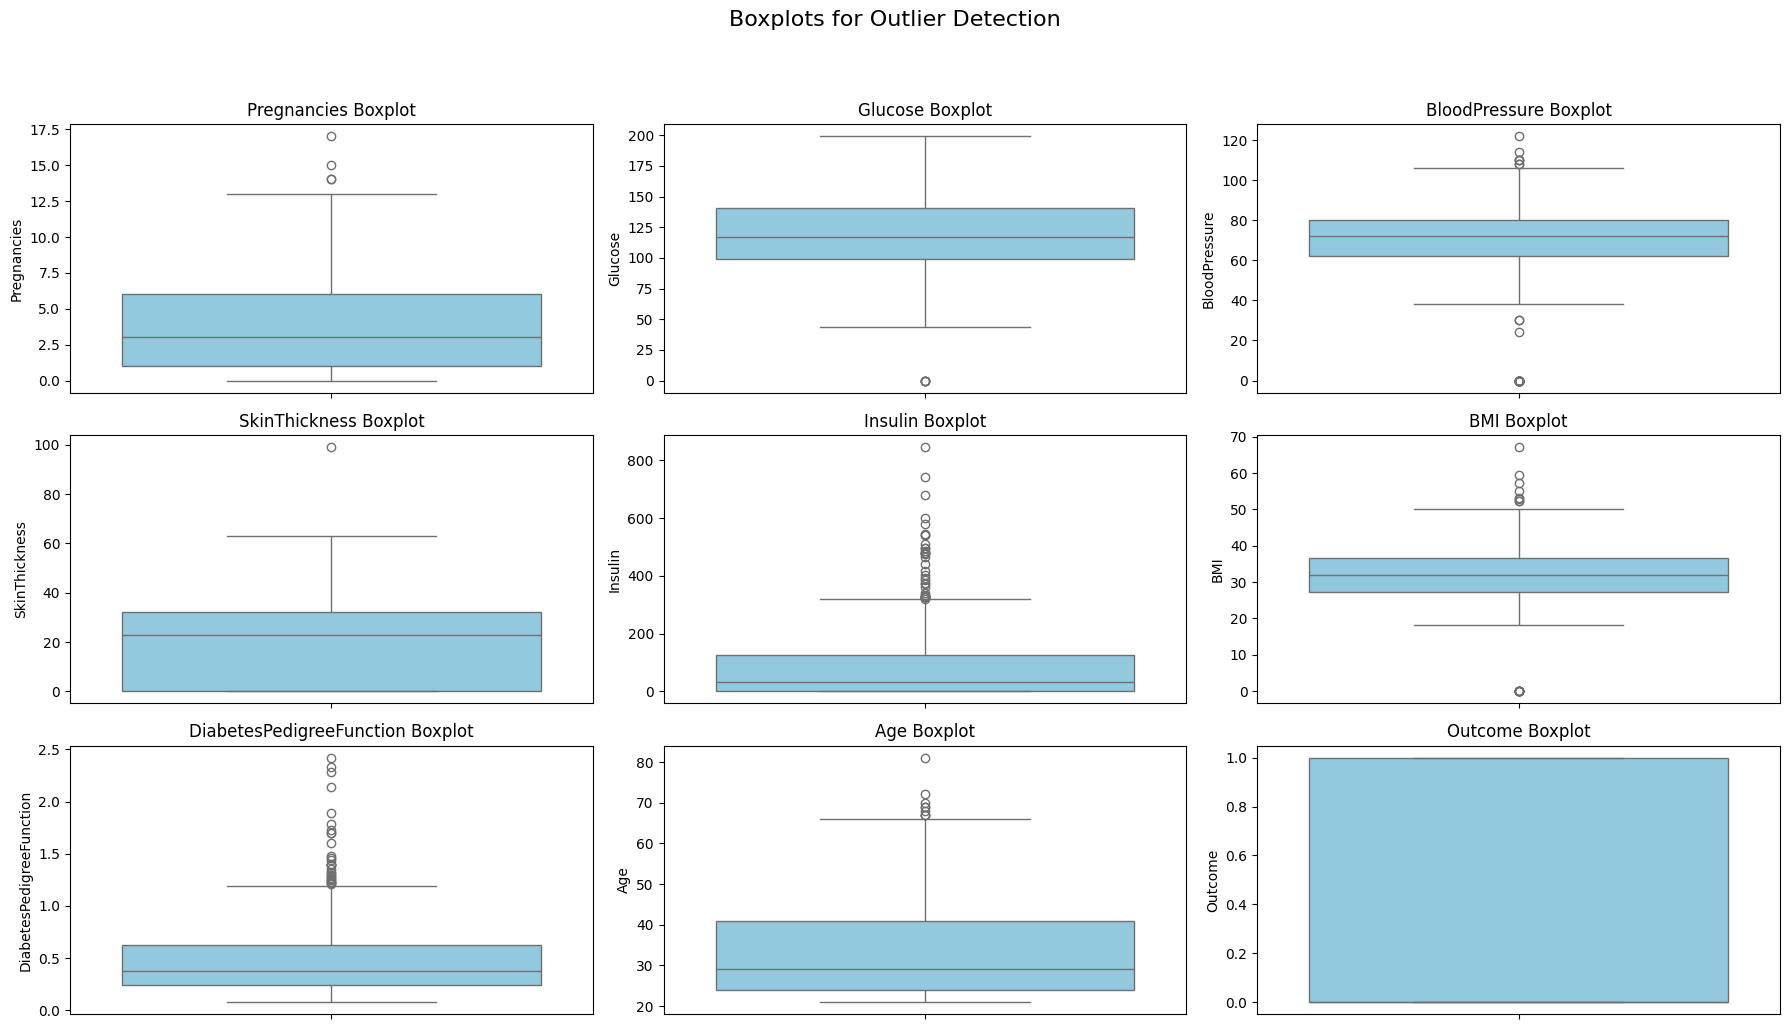

In [ ]:
if 'Outcome' in data.columns:
    print("\nTarget Variable Distribution:")
    print(data['Outcome'].value_counts(normalize=True))

    # Plot distribution of target variable
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data['Outcome'])
    plt.title('Target Variable Distribution')
    plt.xlabel('Outcome')
    plt.ylabel('Count')
    plt.show()

###  Relationships between Features and Target
sns.pairplot(data, hue='Outcome', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Features Colored by Outcome', y=1.02)
plt.show()

###  Outlier Detection
fig, axes = plt.subplots(len(numerical_cols)//3 + 1, 3, figsize=(18, 14))
fig.suptitle('Boxplots for Outlier Detection', fontsize=16)

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=data[col], ax=axes[i//3, i%3], color='skyblue')
    axes[i//3, i%3].set_title(f'{col} Boxplot')

for j in range(i + 1, len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

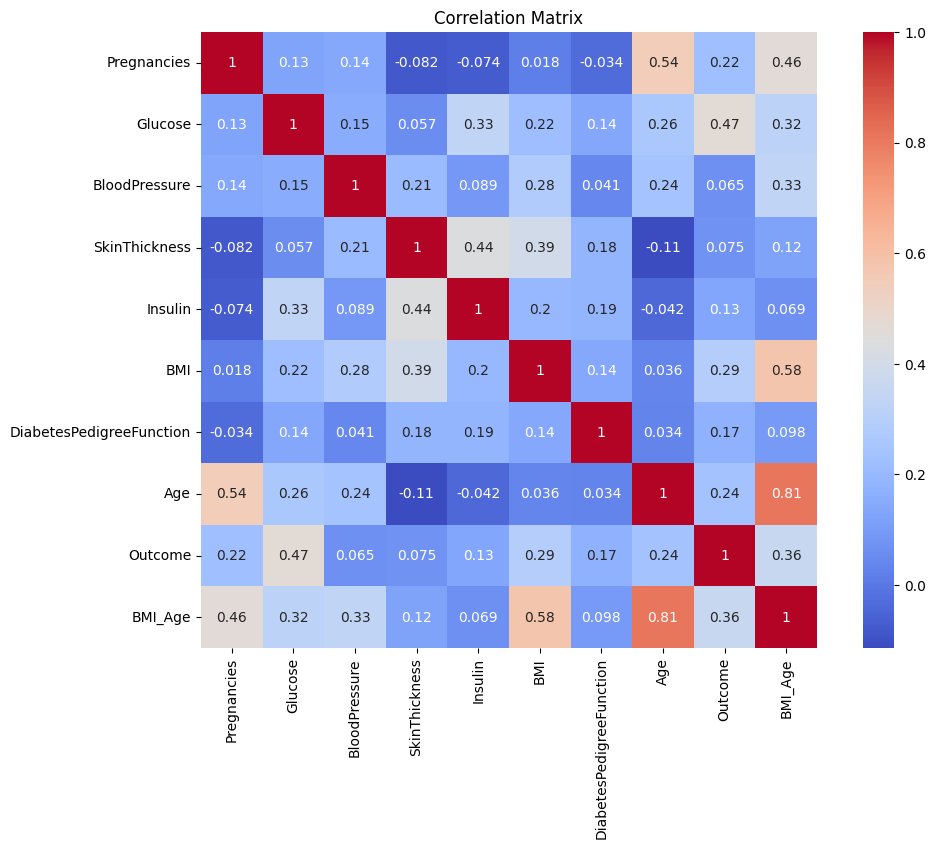

Selected Features with SelectKBest: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'BMI_Age'],
      dtype='object')
Feature Importances from Random Forest:
                           importance
Glucose                     0.254091
BMI_Age                     0.152016
BMI                         0.135724
DiabetesPedigreeFunction    0.112675
Age                         0.096264
BloodPressure               0.075297
Pregnancies                 0.067343
SkinThickness               0.053573
Insulin                     0.053018
Top 4 Features by Random Forest Importance: Index(['Glucose', 'BMI_Age', 'BMI', 'DiabetesPedigreeFunction'], dtype='object')
Number of components selected by PCA: 7
Features selected by RFE: Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction'], dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Fill missing values for numerical columns with the median
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col] = data[col].fillna(data[col].median())

# For categorical columns, fill missing values with the most frequent value
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Convert 'Outcome' to integer type, assuming it's binary (0 or 1)
data['Outcome'] = data['Outcome'].astype(int)

# One-Hot Encoding for nominal categorical features (if any)
data = pd.get_dummies(data, drop_first=True)

# Feature interaction example (BMI * Age)
if 'BMI' in data.columns and 'Age' in data.columns:
    data['BMI_Age'] = data['BMI'] * data['Age']

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))
X[X.select_dtypes(include=['float64', 'int64']).columns] = scaled_features

# Correlation matrix to identify highly correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Splitting features and target variable
X = data.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target variable
y = data['Outcome']

# Feature Selection with SelectKBest (ANOVA F-test for classification)
k_features = min(10, X.shape[1])
selector = SelectKBest(score_func=f_classif, k=k_features)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features with SelectKBest:", selected_features)

# Feature Importance with Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X, y)
feature_importances = pd.DataFrame(model_rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importances from Random Forest:\n", feature_importances)

# Select top 4 features based on Random Forest importance
top_features_rf = feature_importances.head(4).index
print("Top 4 Features by Random Forest Importance:", top_features_rf)

# Dimensionality Reduction with PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f'Number of components selected by PCA: {pca.n_components_}')

# Recursive Feature Elimination (RFE) with Logistic Regression
model_lr = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(model_lr, n_features_to_select=4)
fit = rfe.fit(X, y)
rfe_features = X.columns[fit.support_]
print("Features selected by RFE:", rfe_features)

# Split dataset using the top features
X_train, X_test, y_train, y_test = train_test_split(X[top_features_rf], y, test_size=0.3, random_state=42)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print("Logistic Regression Accuracy:", accuracy_logreg)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))


from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


from sklearn.svm import SVC

# Initialize and train the Support Vector Machine model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))



from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Gradient Boosting Accuracy:", accuracy_gb)
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))



print("\nModel Comparison:")
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"SVM Accuracy: {accuracy_svm}")
print(f"Gradient Boosting Accuracy: {accuracy_gb}")


Logistic Regression Accuracy: 0.7402597402597403
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Random Forest Accuracy: 0.7489177489177489
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

SVM Accuracy: 0.7402597402597403
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Set up the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=50,  # Number of random configurations to try
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV for Random Forest
print("Tuning Random Forest...")
rf_random_search.fit(X_train, y_train)

# Get the best model and accuracy
rf_best_model = rf_random_search.best_estimator_
print("Best Parameters for Random Forest:", rf_random_search.best_params_)
rf_best_accuracy = accuracy_score(y_test, rf_best_model.predict(X_test))
print("Random Forest Accuracy after Tuning:", rf_best_accuracy)


Tuning Random Forest...
Best Parameters for Random Forest: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 40, 'bootstrap': False}
Random Forest Accuracy after Tuning: 0.7575757575757576
